## Imports des packages 

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from pandas_ods_reader import read_ods
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split

## Lecture des données 

In [2]:
path = "data2.ods"
data = read_ods(path)

# Excel brut sans nettoyage des données

In [1]:
data.head(5)

NameError: name 'data' is not defined

# Toutes les questions du questionnaire

In [4]:
data.count()

Horodateur                                                                                                     1191
unnamed.1                                                                                                      1191
unnamed.2                                                                                                      1191
Boutique                                                                                                       1191
code postal                                                                                                    1191
Depuis combien de temps êtes vous un client de la Maison Pariès ?                                              1191
A quelle fréquence venez-vous nous rendre visite ?                                                             1191
Comment nous avez-vous connus ?                                                                                1191
En 2 mots, comment définiriez-vous la Maison ?                          

# Pourcentage des tranches d'âges

In [5]:
print("Pourcentage 65 ans et + :",(data["Tranche d'âge"].value_counts()[2] / data["Tranche d'âge"].count()) * 100)
print("Pourcentage 50/64 ans :",(data["Tranche d'âge"].value_counts()[0] / data["Tranche d'âge"].count()) * 100)
print("Pourcentage 35/49 ans :",(data["Tranche d'âge"].value_counts()[1] / data["Tranche d'âge"].count()) * 100)
print("Pourcentage 25/34 ans :",(data["Tranche d'âge"].value_counts()[3] / data["Tranche d'âge"].count()) * 100)
print("Pourcentage 18/24 ans :",(data["Tranche d'âge"].value_counts()[4] / data["Tranche d'âge"].count()) * 100)
print("Pourcentage 15/17 ans :",(data["Tranche d'âge"].value_counts()[5] / data["Tranche d'âge"].count()) * 100)

Pourcentage 65 ans et + : 24.01343408900084
Pourcentage 50/64 ans : 28.631402183039462
Pourcentage 35/49 ans : 25.356842989084804
Pourcentage 25/34 ans : 13.266162888329136
Pourcentage 18/24 ans : 6.9689336691855575
Pourcentage 15/17 ans : 1.7632241813602016


# On selectionne les colonnes qui nous intéresse pour travailler

In [6]:
data_nettoyer=data[["Boutique","code postal","Depuis combien de temps êtes vous un client de la Maison Pariès ?","A quelle fréquence venez-vous nous rendre visite ?","Comment nous avez-vous connus ?","Quel est le produit que vous préférez ?","Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?","Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?","Que devons-nous faire pour progresser ?","Sexe","Quelle est votre catégorie socio-professionnelle ?","Tranche d'âge","de combien de personnes se compose votre foyer ?","Êtes-vous abonné à notre newsletter ?"]]

In [50]:
data_nettoyer.head()

,Boutique,code postal,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Comment nous avez-vous connus ?,Quel est le produit que vous préférez ?,Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?,"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?",Que devons-nous faire pour progresser ?,Sexe,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,de combien de personnes se compose votre foyer ?,Êtes-vous abonné à notre newsletter ?,Gateau Basque,Code postal,Chocolat
0,St Jean,31410.0,2,0,1,Gateau basque,0,0.0,Je ne sais pas,1,1,5,2.0,0,1,0,0
1,St Jean,64500.0,3,0,1,Pâtisseries,0,1.0,Je ne sais pas,1,1,5,2.0,0,0,1,0
2,St Jean,62400.0,2,1,0,Gateau basque chocolat,0,1.0,Gateau basque plus épais,1,0,3,2.0,0,1,0,0
3,St Jean,33820.0,2,0,0,Viennoiseries Royal Amande,0,2.0,Gateau basque plus épais,0,1,5,2.0,0,0,0,0
4,St Jean,64210.0,2,0,0,Mouchous amande,0,1.0,Baisser les prix; Diversifier les parfums de g...,1,0,3,2.0,0,0,1,0


# Nettoyage des données 

In [11]:
dict = {"Oui" : 1, "Non" : 0}
data_nettoyer=data_nettoyer.replace({"Êtes-vous abonné à notre newsletter ?": dict})
# 1 = Abonné au Newsletter
# 0 = Pas abonné au Newsletter

In [12]:
dict = {"Depuis quelques années" : 2, "Depuis toujours" : 3, "Depuis moins d'un an": 1, "C’est une de mes premières visites" : 0}
data_nettoyer=data_nettoyer.replace({"Depuis combien de temps êtes vous un client de la Maison Pariès ?": dict})
# 0 = C’est une de mes premières visites
# 1 = Depuis moins d'un an
# 2 = Depuis quelques années
# 3 = Depuis toujours

In [13]:
dict = {"visite exceptionnelle" : 0, "visite mensuelle" : 1 , "C'est la première fois !": 0, "visite hebdomadaire" : 1, "Tous les 15 jours" : 1, "3 fois par semaine" : 1 , "Tous les jours" : 1 , "visite exceptionnelle; Surtout en été" : 0,"Surtout en été" : 0 ,"Surtout l'été; Noël" : 0 ,"Surtout l’été" : 0 ,"Tous les 2 jours" : 1 ,"visite exceptionnelle, Surtout en été" : 0}
data_nettoyer=data_nettoyer.replace({"A quelle fréquence venez-vous nous rendre visite ?": dict})
# 1 = Client fidèle (Au moins une fois par mois)
# 0 = Client pas fidèle

In [14]:
dict = {"65 et +" : 5, "25/34" : 3 , "50/64": 5, "18/24" : 1, "35/49" : 4, "15/17" : 0}
data_nettoyer=data_nettoyer.replace({"Tranche d'âge": dict})
# 0 = 15/17
# 1 = 18/24
# 2 = 25/34
# 3 = 35/49
# 4 = 50/64
# 5 = 65 et +

In [15]:
dict = {"oui" : 1, "Non" : 0}
data_nettoyer=data_nettoyer.replace({"Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?": dict})
# 1 = Déjà commandé en ligne
# 0 = Jamais commandé en ligne

In [16]:
dict = {"Femme" : 1, "Homme" : 0}
data_nettoyer=data_nettoyer.replace({"Sexe": dict})
# 1 = Femme
# 0 = Homme

In [17]:
dict = {'Retraité' : 1, 'Employé' : 0,'Cadre et profession intellectuelle supérieure' : 0,'Profession libérale' : 0, 'Etudiant' : 0, 'Sans profession' : 0,"Artisan, commerçant, chef d'entreprise" : 0, 'Ouvrier': 0,'Profession intermédiaire':0, 'Agriculteur exploitant':0}
data_nettoyer=data_nettoyer.replace({"Quelle est votre catégorie socio-professionnelle ?": dict})
# 1 = Retraité
# 0 = Non retraité (Employé quelconque)

In [20]:
dict = {'bouche à oreille':1, 'avec vos parents, votre famille':1,'par hasard en passant devant':0,'par hasard en passant devant; bouche à oreille':0,'bouche à oreille; avec vos parents, votre famille':1, 'Cadeau':0,'Location de vacances':0,'par hasard en passant devant;  bouche à oreille':0,'par hasard en passant devant; avec vos parents, votre famille':0,'par hasard en passant devant; bouche à oreille; avec vos parents, votre famille':0,'par hasard en passant devant; via les réseaux':0, 'via les réseaux':0,'sur un guide':0, 'chez un restaurateur, un café, un revendeur':1,'bouche à oreille; sur un guide':1, 'Publicité':0, 'Travail':1,'Séminaire':1, 'par hasard en passant devant; Sur un salon':0,'sur un guide; via les réseaux':0, 'Carte Synergie':0,'Journal anglais':0, 'Bridge':0, 'En goutant':0,'bouche à oreille; En goutant':1, 'bouche à oreille; Cadeau':1,'Reportage télévisé':0, 'Publicité via les poches':1,'avec vos parents, votre famille; via les réseaux':1,'par hasard en passant devant, BD':0,'par hasard en passant devant, bouche à oreille':0,'par hasard en passant devant, Publicité via les poches':0,'bouche à oreille, En goutant':1, 'Cadeau; En goutant':1,'avec vos parents, votre famille, En goutant':1,'avec vos parents, votre famille; En goutant':1}
data_nettoyer=data_nettoyer.replace({"Comment nous avez-vous connus ?": dict})
# 1 = Famille / Bouche à oreille
# 0 = Hasard

In [18]:
dict = {'Non' : 0, 'oui' : 2}
data_nettoyer=data_nettoyer.replace({"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?": dict})
# 2 = Ils veulent une boutique à proximité
# 0 = Ils ne veulent pas de boutique à proximité
# 1 = Locaux

In [19]:
data_nettoyer["Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?"]=data_nettoyer["Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?"].replace(np.nan, 1)

In [54]:
data_nettoyer['Chocolat'] =(data_nettoyer['Quel est le produit que vous préférez ?'].str.find('Chocolat')>=0).astype(int)
# 0 = Pas chocolat
# 1 = Chocolat

In [52]:
data_nettoyer['Gateau Basque'] =(data_nettoyer['Quel est le produit que vous préférez ?'].str.find('Gateau basque')>=0).astype(int)
# 0 = Pas gateau basque
# 1 = gateau basque

In [53]:
data_nettoyer['Code postal'] =(data_nettoyer['code postal'].astype(str).str.find('64',0,2)==0).astype(int)
# 0 = Autre département
# 1 = Locaux

In [51]:
data_nettoyer["de combien de personnes se compose votre foyer ?"].unique()

array([ 2.,  4.,  3.,  1.,  5.,  6.,  8., nan,  7., 12.])

## Nouveau jeux de données néttoyé

In [55]:
data_nettoyer.head()

,Boutique,code postal,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Comment nous avez-vous connus ?,Quel est le produit que vous préférez ?,Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?,"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?",Que devons-nous faire pour progresser ?,Sexe,Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,de combien de personnes se compose votre foyer ?,Êtes-vous abonné à notre newsletter ?,Gateau Basque,Code postal,Chocolat
0,St Jean,31410.0,2,0,1,Gateau basque,0,0.0,Je ne sais pas,1,1,5,2.0,0,1,0,0
1,St Jean,64500.0,3,0,1,Pâtisseries,0,1.0,Je ne sais pas,1,1,5,2.0,0,0,1,0
2,St Jean,62400.0,2,1,0,Gateau basque chocolat,0,1.0,Gateau basque plus épais,1,0,3,2.0,0,1,0,0
3,St Jean,33820.0,2,0,0,Viennoiseries Royal Amande,0,2.0,Gateau basque plus épais,0,1,5,2.0,0,0,0,0
4,St Jean,64210.0,2,0,0,Mouchous amande,0,1.0,Baisser les prix; Diversifier les parfums de g...,1,0,3,2.0,0,0,1,0


# Fidélité du client en fonction de la fréquence 

# Matrice de confusion (Générale)

In [23]:
data_recoder=data_nettoyer[['Depuis combien de temps êtes vous un client de la Maison Pariès ?','A quelle fréquence venez-vous nous rendre visite ?','Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?',"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?","Quelle est votre catégorie socio-professionnelle ?","Tranche d'âge","Êtes-vous abonné à notre newsletter ?","Chocolat","Gateau Basque","Code postal","Comment nous avez-vous connus ?"]]

In [24]:
data_recoder.head()

,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Avez-vous déjà eu l’occasion de commander nos produits sur notre site en ligne ?,"Si vous n'êtes pas de la région, aimeriez-vous pouvoir trouver nos produits à proximité de votre domicile ?",Quelle est votre catégorie socio-professionnelle ?,Tranche d'âge,Êtes-vous abonné à notre newsletter ?,Chocolat,Gateau Basque,Code postal,Comment nous avez-vous connus ?
0,2,0,0,0.0,1,5,0,0,1,0,1
1,3,0,0,1.0,1,5,0,0,0,1,1
2,2,1,0,1.0,0,3,0,0,1,0,0
3,2,0,0,2.0,1,5,0,0,0,0,0
4,2,0,0,1.0,0,3,0,0,0,1,0


In [25]:
y= data_recoder["A quelle fréquence venez-vous nous rendre visite ?"]
X= data_recoder.drop(["A quelle fréquence venez-vous nous rendre visite ?"],axis=1)

In [26]:
modele=tree.DecisionTreeClassifier(max_depth = 3)
modele=modele.fit(X,y)

In [27]:
y_pred=modele.predict(X)

In [28]:
modele.score(X,y)

0.7380352644836272

In [29]:
confusion_matrix(y,y_pred)

array([[610, 214],
       [ 98, 269]], dtype=int64)

In [30]:
cm=confusion_matrix(y,y_pred,normalize='pred')
cm

array([[0.86158192, 0.44306418],
       [0.13841808, 0.55693582]])

In [31]:
cm_df = pd.DataFrame(cm,index=["client non fidèle","client fidèle"],columns=["client non fidèle","client fidèle"])

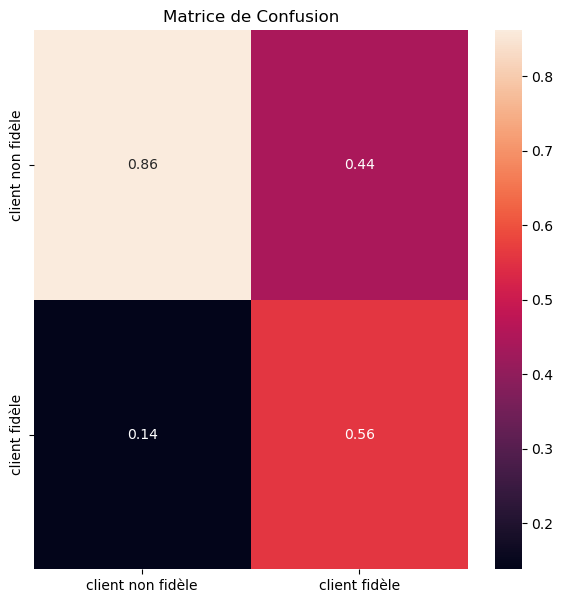

In [32]:
plt.figure(figsize=(7,7))
sns.heatmap(cm_df,annot=True)
plt.title("Matrice de Confusion");

# Arbre de décision (Générale)

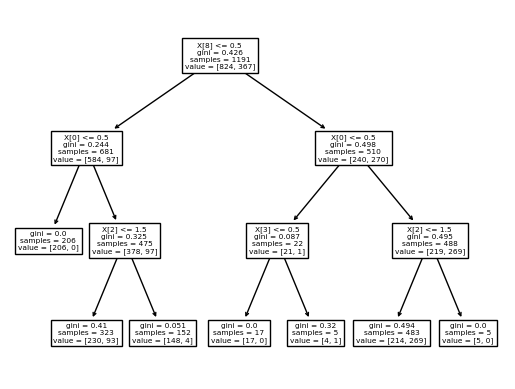

In [33]:
tree.plot_tree(modele);
# cest pas si mal maintenant peut etre essayer d'ameliorer le modele => cherche optimisation arbre de décision sur gogole

# Matrice de confusion (Test)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
modele2=tree.DecisionTreeClassifier(max_depth = 3)
modele2=modele2.fit(X_train,y_train)

In [36]:
y_pred2=modele2.predict(X_test)

In [37]:
modele2.score(X_test,y_test)

0.6871508379888268

In [38]:
cm2=confusion_matrix(y_test,y_pred2,normalize='pred')
cm2

array([[0.71812081, 0.46666667],
       [0.28187919, 0.53333333]])

In [39]:
cm2_df = pd.DataFrame(cm2,index=["client non fidèle","client fidèle"],columns=["client non fidèle","client fidèle"])

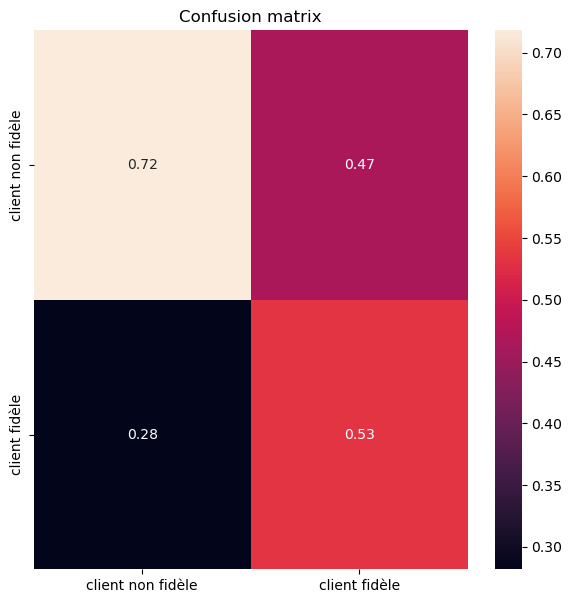

In [40]:
plt.figure(figsize=(7,7))
sns.heatmap(cm2_df,annot=True)
plt.title("Confusion matrix");

# Arbre de décision (Test)

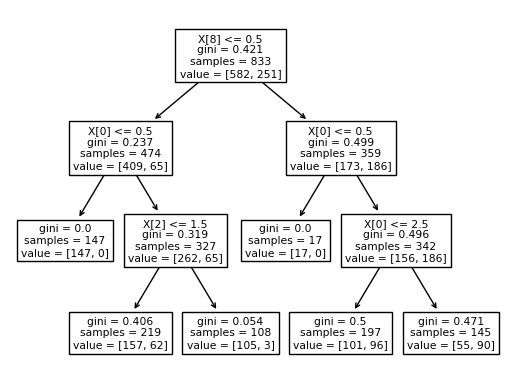

In [41]:
tree.plot_tree(modele2);
# cest pas si mal maintenant peut etre essayer d'ameliorer le modele => cherche optimisation arbre de décision sur gogole

# Matrice de Confusion (Optimisation du modèle)

In [42]:
data_recoder2=data_nettoyer[['Depuis combien de temps êtes vous un client de la Maison Pariès ?','A quelle fréquence venez-vous nous rendre visite ?',"Tranche d'âge","Chocolat","Gateau Basque","Code postal","Comment nous avez-vous connus ?","Sexe"]]

In [43]:
data_recoder2.head()

,Depuis combien de temps êtes vous un client de la Maison Pariès ?,A quelle fréquence venez-vous nous rendre visite ?,Tranche d'âge,Chocolat,Gateau Basque,Code postal,Comment nous avez-vous connus ?,Sexe
0,2,0,5,0,1,0,1,1
1,3,0,5,0,0,1,1,1
2,2,1,3,0,1,0,0,1
3,2,0,5,0,0,0,0,0
4,2,0,3,0,0,1,0,1


In [44]:
y= data_recoder["A quelle fréquence venez-vous nous rendre visite ?"]
X2= data_recoder2.drop(["A quelle fréquence venez-vous nous rendre visite ?"],axis=1)

In [45]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42)

In [46]:
modele_op=tree.DecisionTreeClassifier(max_depth = 3)
modele_op=modele_op.fit(X2_train,y2_train)
y2_pred=modele_op.predict(X2_test)
modele_op.score(X2_test,y2_test)

0.6871508379888268

In [47]:
cm2_op=confusion_matrix(y2_test,y2_pred,normalize='pred')
cm2_op_df = pd.DataFrame(cm2_op,index=["client non fidèle","client fidèle"],columns=["client non fidèle","client fidèle"])
cm2_op

array([[0.71812081, 0.46666667],
       [0.28187919, 0.53333333]])

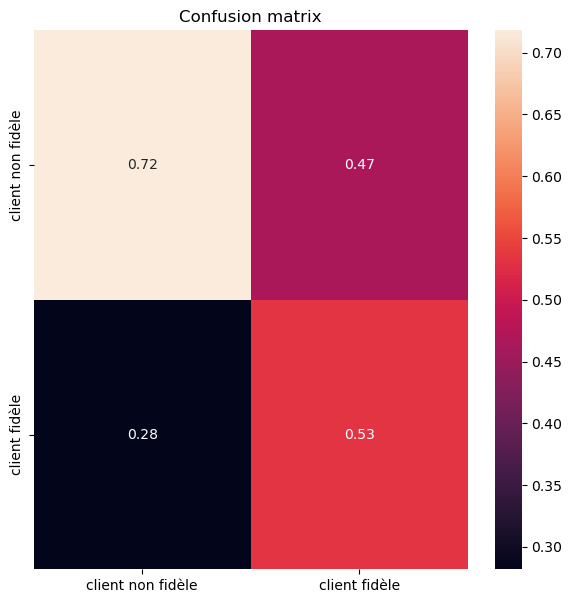

In [48]:
plt.figure(figsize=(7,7))
sns.heatmap(cm2_op_df,annot=True)
plt.title("Confusion matrix");

# Arbre de décision (Optimisation du modèle)

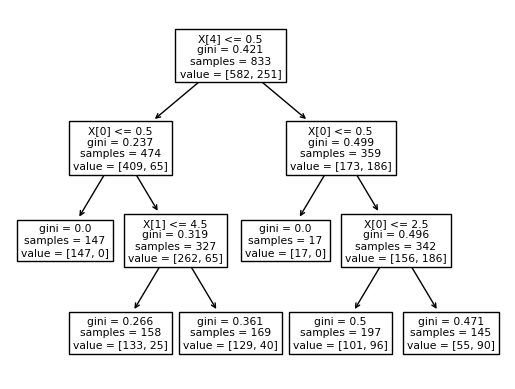

In [49]:
tree.plot_tree(modele_op);
# cest pas si mal maintenant peut etre essayer d'ameliorer le modele => cherche optimisation arbre de décision sur gogole